In [47]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import sys
import subprocess

import scipy.spatial.distance as dist
import numpy as np

In [18]:
sys.path.append('/Users/richard/Downloads/')

In [19]:
import moduleIntron

In [6]:
info = pd.read_csv('./fullTableInfoGff3GffRNAESwithDensity20151109.csv')
info.index = info.shortName

In [21]:
info

,shortName,shortName.1,longName,fastaName,gffName,gff3Name,gc,numGeneGff3,numExonGff3,exonDensityGff3,numIntronGff3,intronDensityGff3,numGeneGff,numExonGff,exonDensityGff,numIntronGff,intronDensityGff,rnaSeqCount,ES
shortName,,,,,,,,,,,,,,,,,,,
Aaoar1,Aaoar1,Aaoar1,Aaosphaeria arxii CBS 175.79 v1.0,Aaoar1_AssemblyScaffolds.fasta.gz,Aaoar1_GeneCatalog_genes_20140429.gff.gz,Aaoar1.filtered_proteins.FilteredModels1.gff3.gz,49.9,14203,39261,2.764275,25058,1.76,14203,39261,2.764275,25058,1.76,1,pass
Acain1,Acain1,Acain1,Acaromyces ingoldii MCA 4198 v1.0,Acain1_AssemblyScaffolds.fasta.gz,Acain1_GeneCatalog_genes_20150309.gff.gz,NaN,57.4,NaN,NaN,NaN,NaN,NaN,8025,24322,3.030779,16297,2.03,0,pass
Acema1,Acema1,Acema1,Acephala macrosclerotiorum EW76-UTF0540 v1.0,Acema1_AssemblyScaffolds.fasta.gz,Acema1_GeneCatalog_genes_20150224.gff.gz,NaN,38.2,NaN,NaN,NaN,NaN,NaN,21024,63616,3.025875,42592,2.03,0,pass
Aciri1_iso,Aciri1_iso,Aciri1_iso,Acidomyces richmondensis BFW,Aciri1_iso_AssemblyScaffolds.fasta.gz,Aciri1_iso_GeneCatalog_genes_20111207.gff.gz,Aciri1_iso.filtered_proteins.FilteredModels1.g...,49.3,11202,25568,2.282450,14355,1.28,11202,25568,2.282450,14366,1.28,12,pass
Aciri1_meta,Aciri1_meta,Aciri1_meta,Acidomyces richmondensis BFW,Aciri1_meta_AssemblyScaffolds.fasta.gz,Aciri1_meta_GeneCatalog_genes_20111216.gff.gz,Aciri1_meta.filtered_proteins.FilteredModels1....,49.7,10352,23763,2.295498,13408,1.30,10352,23763,2.295498,13411,1.30,12,pass
Acral2,Acral2,Acral2,Acremonium alcalophilum v2.0,Acral2_AssemblyScaffolds.fasta.gz,Acral2_GeneCatalog_genes_20110414.gff.gz,Acral2.filtered_proteins.FilteredModels3_1.gff...,46.4,5405,20231,3.743016,14826,2.74,9521,35580,3.737002,26059,2.74,3,pass
Acrst1,Acrst1,Acrst1,Acremonium strictum DS1bioAY4a v1.0,Acrst1_AssemblyScaffolds.fasta.gz,Acrst1_GeneCatalog_genes_20141022.gff.gz,NaN,52.7,NaN,NaN,NaN,NaN,NaN,13158,37246,2.830673,24088,1.83,0,pass
Agabi_varbisH97_2,Agabi_varbisH97_2,Agabi_varbisH97_2,Agaricus bisporus var bisporus (H97) v2.0,Abisporus_varbisporusH97.v2_AssembledScaffolds...,NaN,Agabi_varbisH97_2.filtered_proteins.FilteredMo...,46.5,10438,63113,6.046465,52674,5.05,NaN,NaN,NaN,NaN,NaN,7,pass
Agabi_varbur_1,Agabi_varbur_1,Agabi_varbur_1,Agaricus bisporus var. burnettii JB137-S8,Abisporus_varburnettii.v2.unmasked.fasta.gz,NaN,Agabi_varbur_1.filtered_proteins.FilteredModel...,46.6,11289,64626,5.724688,53332,4.72,NaN,NaN,NaN,NaN,NaN,7,pass


In [7]:
shortNames = []
with open('species.txt') as f:
    for line in f:
        shortNames.append(line.split()[-1])

In [8]:
jgi = info.ix[shortNames]

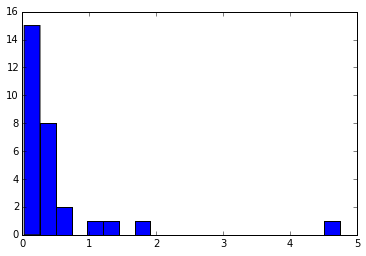

In [20]:
plt.hist(jgi.intronDensityGff3, bins=20)
plt.show()

In [ ]:
## copy gff files

In [25]:
script = ''
for shortName in shortNames:
    command = 'scp richard@topaz.gatech.edu:/home/richard/largeDataSet/fungi_download/{}/{} /Users/richard/Downloads/'.format(shortName, info.ix[shortName]['gffName'])
    try:
        subprocess.check_call(command, shell= True)
    except:
        print "problem with {}".format(shortName)

problem with Cante1
problem with Spapa3


In [56]:
shortNames = filter(lambda x: x not in ['Cante1','Spapa3','Pneji1'], shortNames)

In [108]:
density = {}
for shortName in shortNames:
    gffName = info.ix[shortName]['gffName'][:-3]
    density[shortName] = moduleIntron.get_intron_density('/Users/richard/Desktop/Bioinfo_Research_Place/jgi_species/{}'.format(gffName))

(array([ 4.,  3.,  1.,  6.,  4.,  3.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.02592593,  1.0997206 ,  1.17351527,  1.24730994,  1.32110462,
         1.39489929,  1.46869396,  1.54248864,  1.61628331,  1.69007798,
         1.76387266,  1.83766733,  1.911462  ,  1.98525667,  2.05905135,
         2.13284602,  2.20664069,  2.28043537,  2.35423004,  2.42802471,
         2.50181938]),
 <a list of 20 Patch objects>)

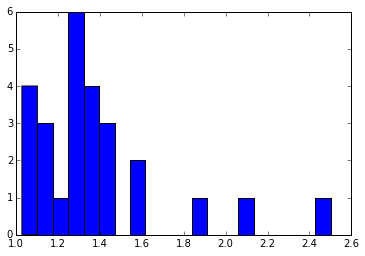

In [109]:
plt.hist(density.values(), bins= 20)

In [140]:
gc = np.array([info.ix[shortName].gc for shortName in shortNames])

In [141]:
intronDensity = np.array([density[shortName] for shortName in shortNames])
intronDensityExp = np.exp(-intronDensity)

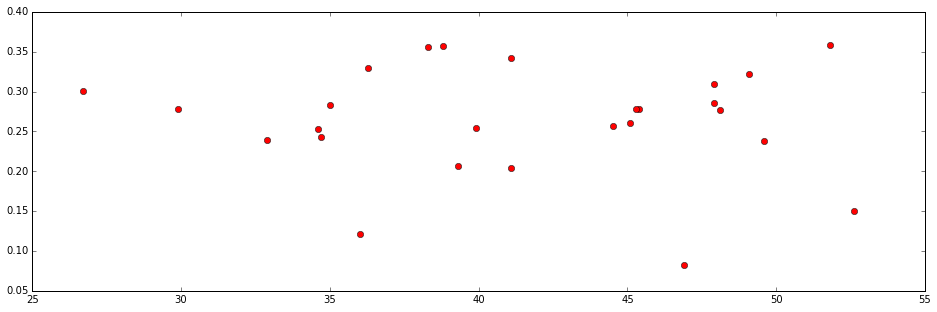

In [142]:
plt.figure(figsize=(16,5))
plt.plot(gc, intronDensityExp, 'ro')

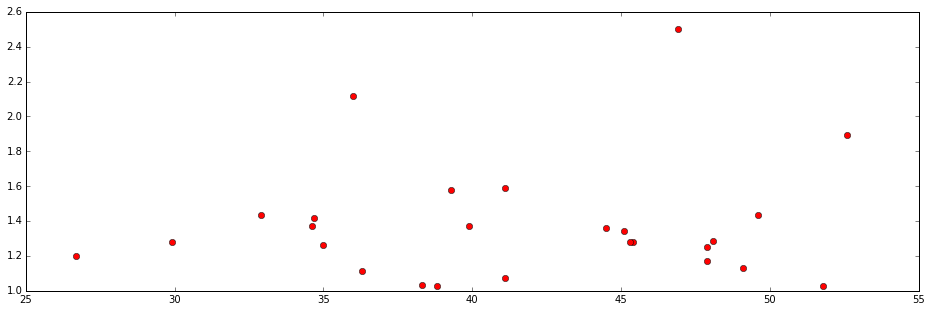

In [143]:
plt.figure(figsize=(16,5))
plt.plot(gc, intronDensity, 'ro')

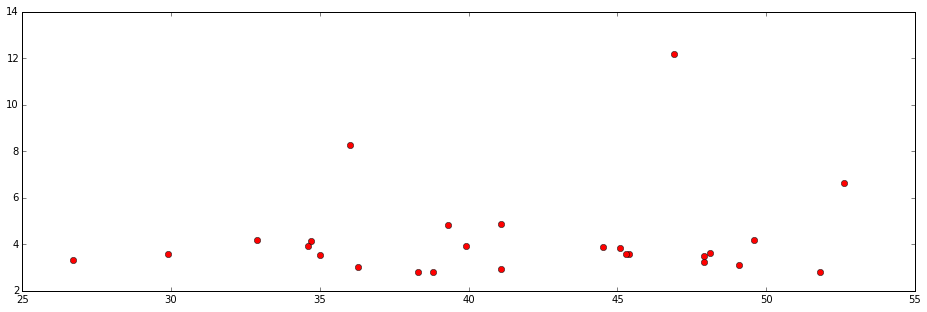

In [194]:
plt.figure(figsize=(16,5))
plt.plot(gc, np.exp(intronDensity), 'ro')

In [113]:
longNames = [info.ix[shortName]['longName'] for shortName in shortNames]
sub_jgi = pd.DataFrame({'shortName':shortNames, 'longName':longNames,'gc':gc, 'intronDensity':intronDensity, 'intronDensityExp':intronDensityExp})

(array([ 1.,  1.,  1.,  5.,  3.,  3.,  1.,  4.,  5.,  2.]),
 array([ 26.7 ,  29.29,  31.88,  34.47,  37.06,  39.65,  42.24,  44.83,
         47.42,  50.01,  52.6 ]),
 <a list of 10 Patch objects>)

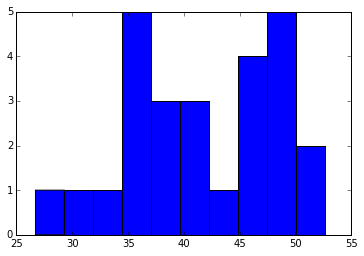

In [114]:
plt.hist(gc)

(array([ 2.,  0.,  4.,  4.,  2.,  6.,  5.,  1.,  1.,  1.]),
 array([  3.84278856,   5.3153553 ,   6.78792203,   8.26048877,
          9.73305551,  11.20562225,  12.67818898,  14.15075572,
         15.62332246,  17.09588919,  18.56845593]),
 <a list of 10 Patch objects>)

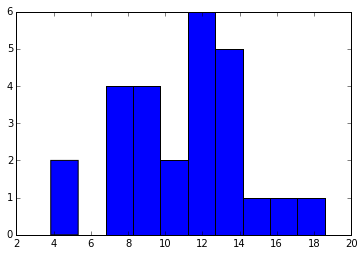

In [115]:
plt.hist(gc*intronDensityExp)

(array([ 2.,  3.,  4.,  3.,  3.,  4.,  4.,  2.,  0.,  1.]),
 array([ 17.0262017 ,  20.372679  ,  23.7191563 ,  27.06563361,
         30.41211091,  33.75858821,  37.10506552,  40.45154282,
         43.79802012,  47.14449743,  50.49097473]),
 <a list of 10 Patch objects>)

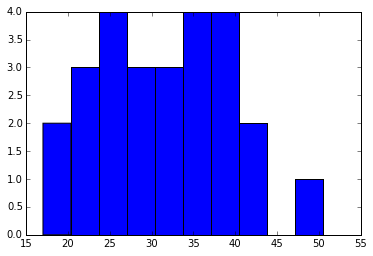

In [116]:
plt.hist(gc/intronDensity)

(array([ 17.,   5.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  32.61145364,   58.88107272,   85.1506918 ,  111.42031088,
         137.68992996,  163.95954904,  190.22916812,  216.4987872 ,
         242.76840628,  269.03802536,  295.30764444]),
 <a list of 10 Patch objects>)

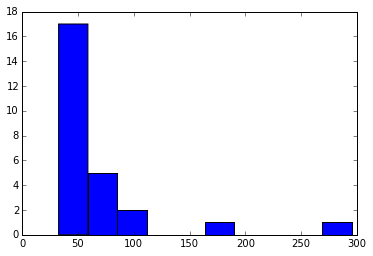

In [117]:
plt.hist(gc/ np.exp(-np.array(info.ix[shortNames].intronDensityGff3)))

In [94]:
## check all species

In [95]:
idx = ~pd.isnull(info.intronDensityGff)

In [98]:
test = info.ix[idx]

In [106]:
target = '/Users/richard/Desktop/Bioinfo_Research_Place/gff/'
source = '/Users/richard/Desktop/Bioinfo_Research_Place/fungi_download/'

In [107]:
# cp all species with gff to target
for shortName in test.index:
    command = 'cp {}{}/{} {}'.format(source, shortName, test.ix[shortName].gffName, target)
    subprocess.check_call(command, shell = True)

In [119]:
densities = {}
for shortName in test.index:
    gffName = info.ix[shortName]['gffName'][:-3]
    try:
        densities[shortName] = moduleIntron.get_intron_density('/Users/richard/Desktop/Bioinfo_Research_Place/gff/{}'.format(gffName))
    except:
        densities[shortName] = -1

In [152]:
densities = {key:densities[key] for key in densities if densities[key] > 0}

In [153]:
gc_test = np.array([test.ix[shortName].gc for shortName in densities])

In [159]:
intronDensity_test = np.array([densities[shortName] for shortName in densities])
intronDensityExp_test = np.exp(-intronDensity_test)

(1, 6)

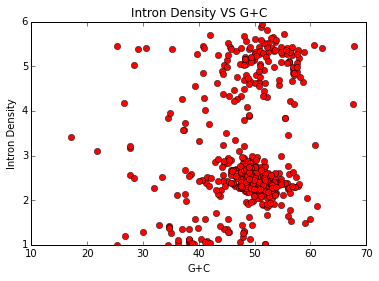

In [193]:
# plt.figure(figsize=(16,9))
plt.plot(gc_test, intronDensity_test,'ro')
plt.title('Intron Density VS G+C')
plt.xlabel('G+C')
plt.ylabel('Intron Density')
plt.ylim(1,6)

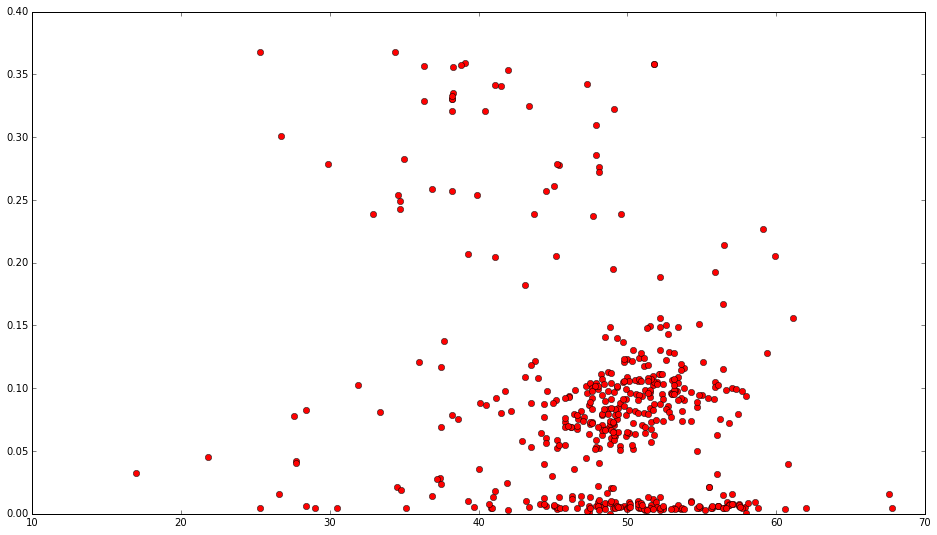

In [182]:
plt.figure(figsize=(16,9))
plt.plot(gc_test, intronDensityExp_test,'ro'); plt.show()

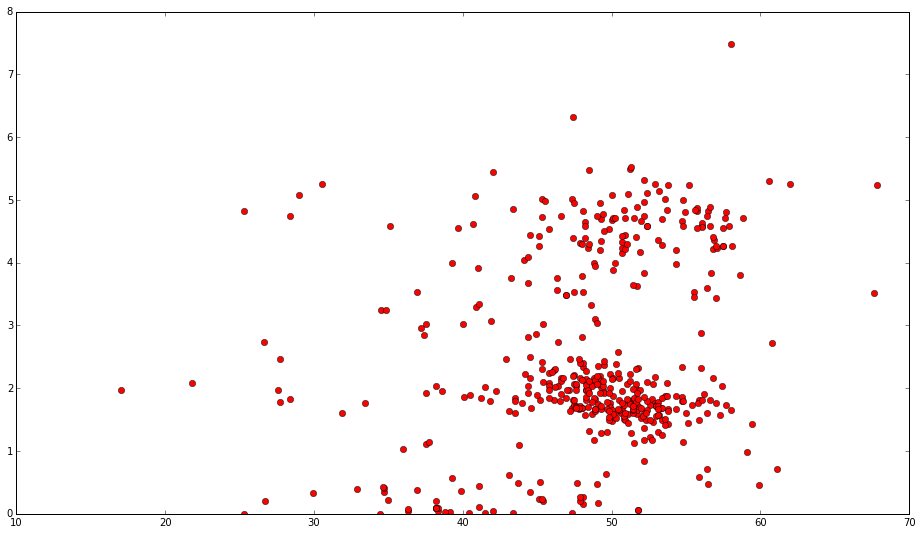

In [181]:
intronDensity_test_old = np.array([test.ix[shortName].intronDensityGff for shortName in densities])
plt.figure(figsize=(16,9))
plt.plot(gc_test, intronDensity_test_old,'ro'); plt.show()

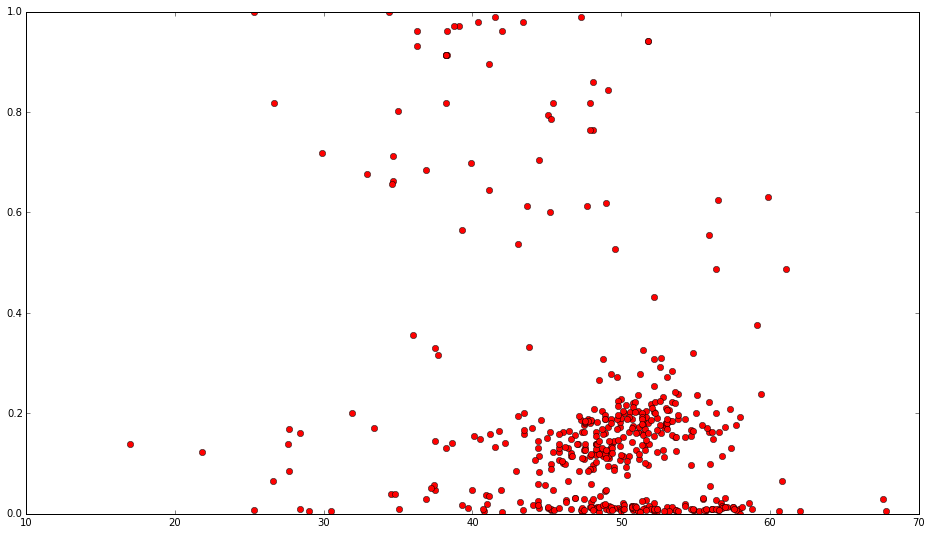

In [184]:
intronDensity_test_old = np.array([test.ix[shortName].intronDensityGff for shortName in densities])
plt.figure(figsize=(16,9))
plt.plot(gc_test, np.exp(-intronDensity_test_old),'ro'); plt.show()

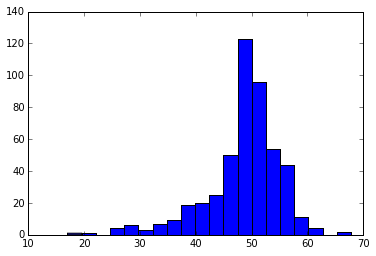

In [163]:
plt.hist(gc_test, bins = 20); plt.show()

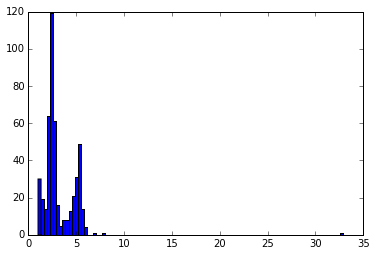

In [139]:
plt.hist(intronDensity, bins=100); plt.show()

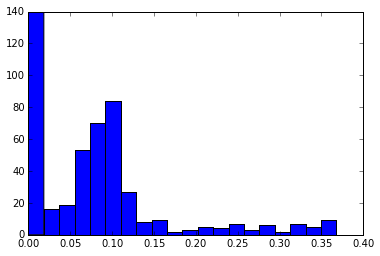

In [165]:
plt.hist(intronDensityExp_test, bins=20); plt.show()

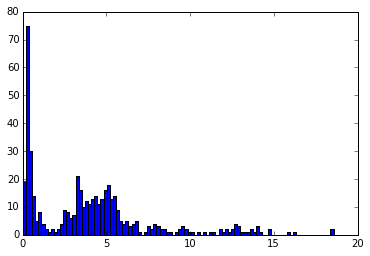

In [170]:
plt.hist(gc_test*intronDensityExp_test, bins=100); plt.show()

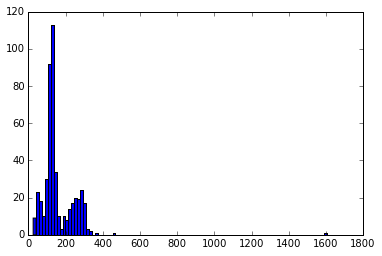

In [169]:
plt.hist(gc_test*intronDensity_test, bins=100); plt.show()